In [1]:
import matplotlib.pyplot as plt

from coremdlr.datasets import FaciesDataset

from coremdlr.viz import CorePlotter

Using TensorFlow backend.
/home/administrator/code/python/coremdlr/coremdlr/facies/viz/__init__.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/administrator/anaconda3/envs/core-dev/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/administrator/anaconda3/envs/core-dev/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.st

In [2]:
well_names = ["205-21b-3", "204-20-6a", "204-20-1Z", "204-19-6"]

fdset = FaciesDataset(well_names[:-1], [well_names[-1]], features=['image'], label_resolution=16)

fdset.load_or_generate_data()

Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (7685,)), ('top', (7685,)), ('base', (7685,)), ('image', (7685, 16, 600, 3))]
Loading Well:  204-20-6a  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (7745,)), ('top', (7745,)), ('base', (7745,)), ('image', (7745, 16, 600, 3))]
Loading Well:  204-20-1Z  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3834,)), ('top', (3834,)), ('base', (3834,)), ('image', (3834, 16, 600, 3))]


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3771,)), ('top', (3771,)), ('base', (3771,)), ('image', (3771, 16, 600, 3))]


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [3]:
well_names[-1]

'204-19-6'

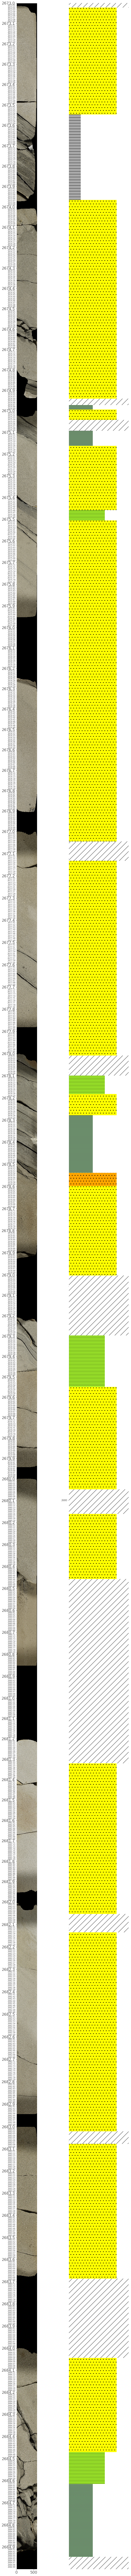

In [4]:
well = fdset.get_well("204-20-1Z")

cplotter = CorePlotter(figsize=(10,200))
cplotter.plot_image(well._image / 255.0, depths=well._depth)

labels = well.make_striplog()
cplotter.plot_strip(labels)

plt.show()

In [11]:
well.make_striplog(save_csv='./204-20-1Z_current_picks.csv')

Striplog(36 Intervals, start=2673.0, stop=2684.997833823302)

In [14]:
from io import StringIO

from coremdlr.config import strip_config

df = pd.read_csv(StringIO(labels.to_csv()))
df.Top = df.Top.apply(lambda x: '{0:.3f}'.format(x))
df.Base = df.Base.apply(lambda x: '{0:.3f}'.format(x))
df.Component = df.Component.apply(strip_config.lithology_to_key)
df.columns = ['top', 'base', 'lithology']
df.to_csv('./204-20-1Z_current_picks.csv', index=False)

df

,top,base,lithology
0,2673.000,2673.021,nc
1,2673.021,2673.521,s
2,2673.521,2673.921,sh
3,2673.921,2674.850,s
4,2674.850,2674.879,nc
5,2674.879,2674.901,ih
6,2674.901,2674.949,s
7,2674.949,2675.000,nc
8,2675.000,2675.071,ih
9,2675.071,2675.371,s
